In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from tqdm import tqdm
import time

In [2]:
def crop (in_img):
    # import cv2
    zmensene = False #!!! můžou fungovat lépe aneb když programátor nepřizná, že mu to prostě nefunguje
    if zmensene == True:
        cropped = in_img
        # cropped = cv2.resize(source, (800, 600))                     # POZOR, ROZMĚRY SE NEPOČÍTAJÍ
        # cropped = cropped[100 : 540, 70 : 700]        #crop malých, mnou zmenšeny
    else:
        # cropped = source[1480 : 8000, 410 : right]        #crop velkých, originálů
        cropped = in_img[1480 : 8000, 410 : 10200]        #crop velkých, originálů

        # zamalování loga UP
        cropped = cv2.rectangle(cropped, (8800, 0), (10290, 1409), (0, 0, 0), -1)
        cropped = cv2.rectangle(cropped, (0, 0), (1409, 1409), (0, 0, 0), -1)
    # cropped = source

    return cropped

In [3]:
def bake(bake_img, hard = None):
    # global bake_img
    if hard == True:
        cv2.imwrite("temp.png", bake_img)
        return cv2.imread("temp.png")
    else:
        return bake_img.astype(np.uint8)

In [4]:
show_imgs = False
os.system('cls')

0

In [5]:
# najde všechny soubory v IN složce, aby se mohl loopnout
inputs_jpg = os.listdir("in/")
inputs = []
for a in inputs_jpg:
    l = len(a)
    short = a[:l - 4]
    inputs.append(short)
# vynechávám img_num, protože ho nepotřebuji
if show_imgs == True:
    cv2.namedWindow("win", cv2.WINDOW_AUTOSIZE)

# Další by mělo být v for inputs
ale protože jupyter(a rozhodně ne že já ho neumím): neloopuju se, ale jedu jenom 1 obrázek

In [6]:
# actual_img = "2022_02_23_12_45_14"   
actual_img = "2022_02_25_10_57_13"

In [7]:
# načte BW obrázek
bw = cv2.imread("in/{}.jpg".format(actual_img), 0).astype("float64") # 0 protože chci černobílý obrázek (pro krok úprava)
# bw = cv2.cvtColor(source, cv2.COLOR_RGB2GRAY)

# zamalování loga UP
bw = cv2.rectangle(bw, (10000, 1211), (11800, 1930), (0), -1)
bw = cv2.rectangle(bw, (0, 1100), (860, 2700), (0), -1)

cv2.imwrite("debug/1.BW/{}.png".format(actual_img), bw)

if show_imgs == True:
    frame = cv2.resize(bw, (979, 652))
    cv2.imshow('win', frame)
    cv2.waitKey(200) 

In [8]:
def thresholdit (source, times):
    suma = 0
    h, w = source.shape[:2]

    for a in source:
        for b in a:
            suma = suma + b
    avg = suma / (h*w)

    much = avg * times

    _, th = cv2.threshold(source, much, 255, cv2.THRESH_BINARY)
    return th

100%|██████████| 8702/8702 [02:26<00:00, 59.58it/s]


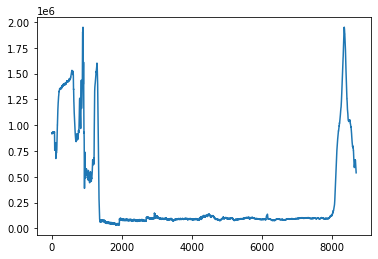

324101.0 1349
352777.0 8103


In [9]:
# sečte řádky, cropne
# mám 8702 řádků, a v nich  11630 sloupců
# ŘÁDKY - spočítám první součet, potom najdu údolí

suma_radek = []

# sečtu řádky
for radek in tqdm(bw):
    suma = 0
    for num in radek:
        suma += num
    suma_radek.append(suma)

# najdu si výšku obrázku
h, w = bw.shape[:2]
range_radku = range(h)


# plotnu to
plt.plot(range_radku, suma_radek)
plt.show()


# NAJDU CROP zvrchu a zespodu


# idea zatímhle je, že sopočítám průměr, a když je toto pod průměrem, 
average = 0
lpnb = 0


# for num in suma_radek:
#     lpnb += 1
#     average += num
# average /= lpnb
# print(average)
average = 350000

lpnb = 0
inside = False
for suma in suma_radek:
    lpnb += 1
    if suma < average and inside == False:
        inside = not inside
        ctop = lpnb
        print(suma, lpnb)
    if suma > average and inside == True:
        cbot = lpnb
        inside = not inside
        print(suma, lpnb)

100%|██████████| 11630/11630 [04:03<00:00, 47.68it/s]


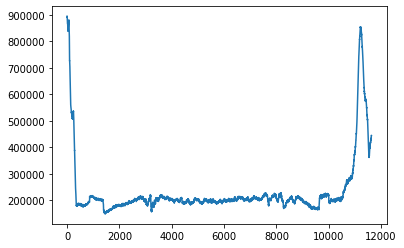

324101.0 1349
352777.0 8103


In [10]:
# # sečte sloupce, cropne
# mám 8702 řádků, a v nich  11630 sloupců
# SLOUPCE
suma_sloupce = []

h, w = bw.shape[:2]
range_sloupce = range(w)

for sloupec in tqdm(range(w)):
    # print(sloupec)
    suma = 0
    for radek in range(h):
        suma += bw[radek, sloupec]
    suma_sloupce.append(suma)
    

# Function to plot


plt.plot(range_sloupce, suma_sloupce)
plt.show()



average = 0
lpnb = 0

average = 350000

lpnb = 0
inside = False
for suma in suma_radek:
    lpnb += 1
    if suma < average and inside == False:
        inside = not inside
        ctop = lpnb
        print(suma, lpnb)
    if suma > average and inside == True:
        cbot = lpnb
        inside = not inside
        print(suma, lpnb)

In [11]:
# najde left a right crop obrázku na černou


average = 0
lpnb = 0

# for num in suma_sloupce:
#     lpnb += 1
#     average += num
# average /= lpnb
# print(average)
average = 350000

lpnb = 0
inside = False
temps = []

for suma in suma_sloupce:
    lpnb += 1
    if suma < average and inside == False:
        inside = not inside
        # cleft = lpnb
        temps.append(lpnb)
        print(suma, lpnb)
    if suma > average and inside == True:
        inside = not inside
        # crig = lpnb
        temps.append(lpnb)
        print(suma, lpnb)
print()
crig = max(temps) 
cleft = min(temps) 

print(cleft, crig)


349519.0 299
352660.0 10961
349076.0 10962
351449.0 10967

299 10967


In [12]:
# cropne obrázky podle předchozích kroků
margin = 40
crp = bw[int(ctop+margin) : int(cbot-margin), int(cleft+margin) : int(crig-margin)]

print(crp)

cv2.imwrite("debug/2.cropped/{}.png".format(actual_img), crp)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [66. 67. 68. ... 39. 44. 48.]
 [64. 66. 67. ... 40. 45. 48.]
 [64. 66. 67. ... 42. 45. 48.]]


True

In [13]:
# cropne crp pro aplikování otsuovy metody

crp_otsu = crp []

SyntaxError: invalid syntax (<ipython-input-13-d08bbcfe7089>, line 3)